In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
pl.style.use('seaborn-whitegrid')

In [3]:
df=pd.read_excel('RecommendationEngineData.xlsx')

In [5]:
df.head()

,POST_ID,POST_STRING_UNIQUE_ID,CREATED_AT,Creator_Name,Caption,Length,Watch_Views,Total_Watch_time,Average_Watch_time,10_Sec_Watch_Time,...,Execution_Reach,Spammy_Views,Love,Comment,Share,Report_Abuse,Repost_Count,Creation_type,ContentType,LANGUAGE_NAME
0,5251588,ec7e9ef3246874618d617623ee07451c,2020-04-22 19:51:00,Nojoto News,Know who loved your story | Tag Nojotians #Noj...,51,61196,732610,12.0,584192,...,1000000,28445,1720,108,35,0,73,Uploaded,Video,English
1,5539448,e38e34aa65c0c7c2ed42426fe92e6419,2020-05-10 18:00:00,Nojoto News,Details for Day 1 (Monday) :- \nExpress Karo N...,168,2751,33002,12.0,25716,...,50000,1037,130,10,4,0,17,Uploaded,Video,English
2,5503440,01e4dc698aba6a4561739c58906838cc,2020-05-08 07:33:00,Anand Mohan Jha,Anshh only 4 youðŸ˜‚ sorry #Nojoto #story #Poe...,0,7086,126534,17.9,110171,...,50000,2606,337,113,9,0,21,Uploaded,Video,English
3,5538585,87d93e56b144f5ba7557663b2fb6218c,2020-05-10 15:18:00,Anand Mohan Jha,#krishna_flute à¤®à¤¾à¤ à¤¤à¥‹ à¤®à¤¾à¤ à¤¹à...,0,1119,19908,17.8,17109,...,10000,447,114,34,2,0,12,Created,Video,English
4,5540220,4b20839183de924a7bc8e4bcdc9c20a2,2020-05-10 17:11:00,Bhawna Mishra,#SuperMom #chitthi #letter #originalmess #message,116,1075,15966,14.9,13091,...,10000,376,143,49,1,0,13,Created,Video,English


In [7]:
df.columns

Index(['POST_ID', 'POST_STRING_UNIQUE_ID', 'CREATED_AT', 'Creator_Name',
       'Caption', 'Length', 'Watch_Views', 'Total_Watch_time',
       'Average_Watch_time', '10_Sec_Watch_Time', '10_Sec_Views',
       'Execution_Reach', 'Spammy_Views', 'Love', 'Comment', 'Share',
       'Report_Abuse', 'Repost_Count', 'Creation_type', 'ContentType',
       'LANGUAGE_NAME'],
      dtype='object')

In [10]:
df1=df.copy()
df1.drop(['POST_ID','POST_STRING_UNIQUE_ID','CREATED_AT'],axis=1,inplace=True)

In [11]:
df1.head()

,Creator_Name,Caption,Length,Watch_Views,Total_Watch_time,Average_Watch_time,10_Sec_Watch_Time,10_Sec_Views,Execution_Reach,Spammy_Views,Love,Comment,Share,Report_Abuse,Repost_Count,Creation_type,ContentType,LANGUAGE_NAME
0,Nojoto News,Know who loved your story | Tag Nojotians #Noj...,51,61196,732610,12.0,584192,21149,1000000,28445,1720,108,35,0,73,Uploaded,Video,English
1,Nojoto News,Details for Day 1 (Monday) :- \nExpress Karo N...,168,2751,33002,12.0,25716,631,50000,1037,130,10,4,0,17,Uploaded,Video,English
2,Anand Mohan Jha,Anshh only 4 youðŸ˜‚ sorry #Nojoto #story #Poe...,0,7086,126534,17.9,110171,2777,50000,2606,337,113,9,0,21,Uploaded,Video,English
3,Anand Mohan Jha,#krishna_flute à¤®à¤¾à¤ à¤¤à¥‹ à¤®à¤¾à¤ à¤¹à...,0,1119,19908,17.8,17109,334,10000,447,114,34,2,0,12,Created,Video,English
4,Bhawna Mishra,#SuperMom #chitthi #letter #originalmess #message,116,1075,15966,14.9,13091,332,10000,376,143,49,1,0,13,Created,Video,English


In [12]:
df1.describe()

,Length,Watch_Views,Total_Watch_time,Average_Watch_time,10_Sec_Watch_Time,10_Sec_Views,Execution_Reach,Spammy_Views,Love,Comment,Share,Report_Abuse,Repost_Count
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,104.448000,2846.651000,4.301675e+04,14.165800,35449.142000,984.14100,11383.00000,883.922000,242.542000,39.740000,4.483000,0.0,8.661000
std,87.586384,4599.174397,7.344618e+04,3.929419,61858.176108,1667.32367,33979.30111,1480.606192,229.016141,36.382194,10.604535,0.0,9.156961
min,0.000000,148.000000,1.431000e+03,5.300000,737.000000,29.00000,1000.00000,53.000000,37.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,755.250000,9.142500e+03,11.375000,6808.500000,214.75000,5000.00000,267.750000,113.000000,14.000000,0.000000,0.0,3.000000
50%,101.000000,1356.500000,1.985050e+04,13.600000,15964.000000,445.50000,5000.00000,459.000000,168.000000,28.000000,1.000000,0.0,6.000000
75%,180.250000,2873.750000,4.339400e+04,16.300000,35946.000000,964.00000,10000.00000,868.250000,277.250000,55.000000,4.000000,0.0,12.000000
max,320.000000,61196.000000,1.058837e+06,31.700000,929662.000000,21149.00000,1000000.00000,28445.000000,2657.000000,283.000000,150.000000,0.0,91.000000


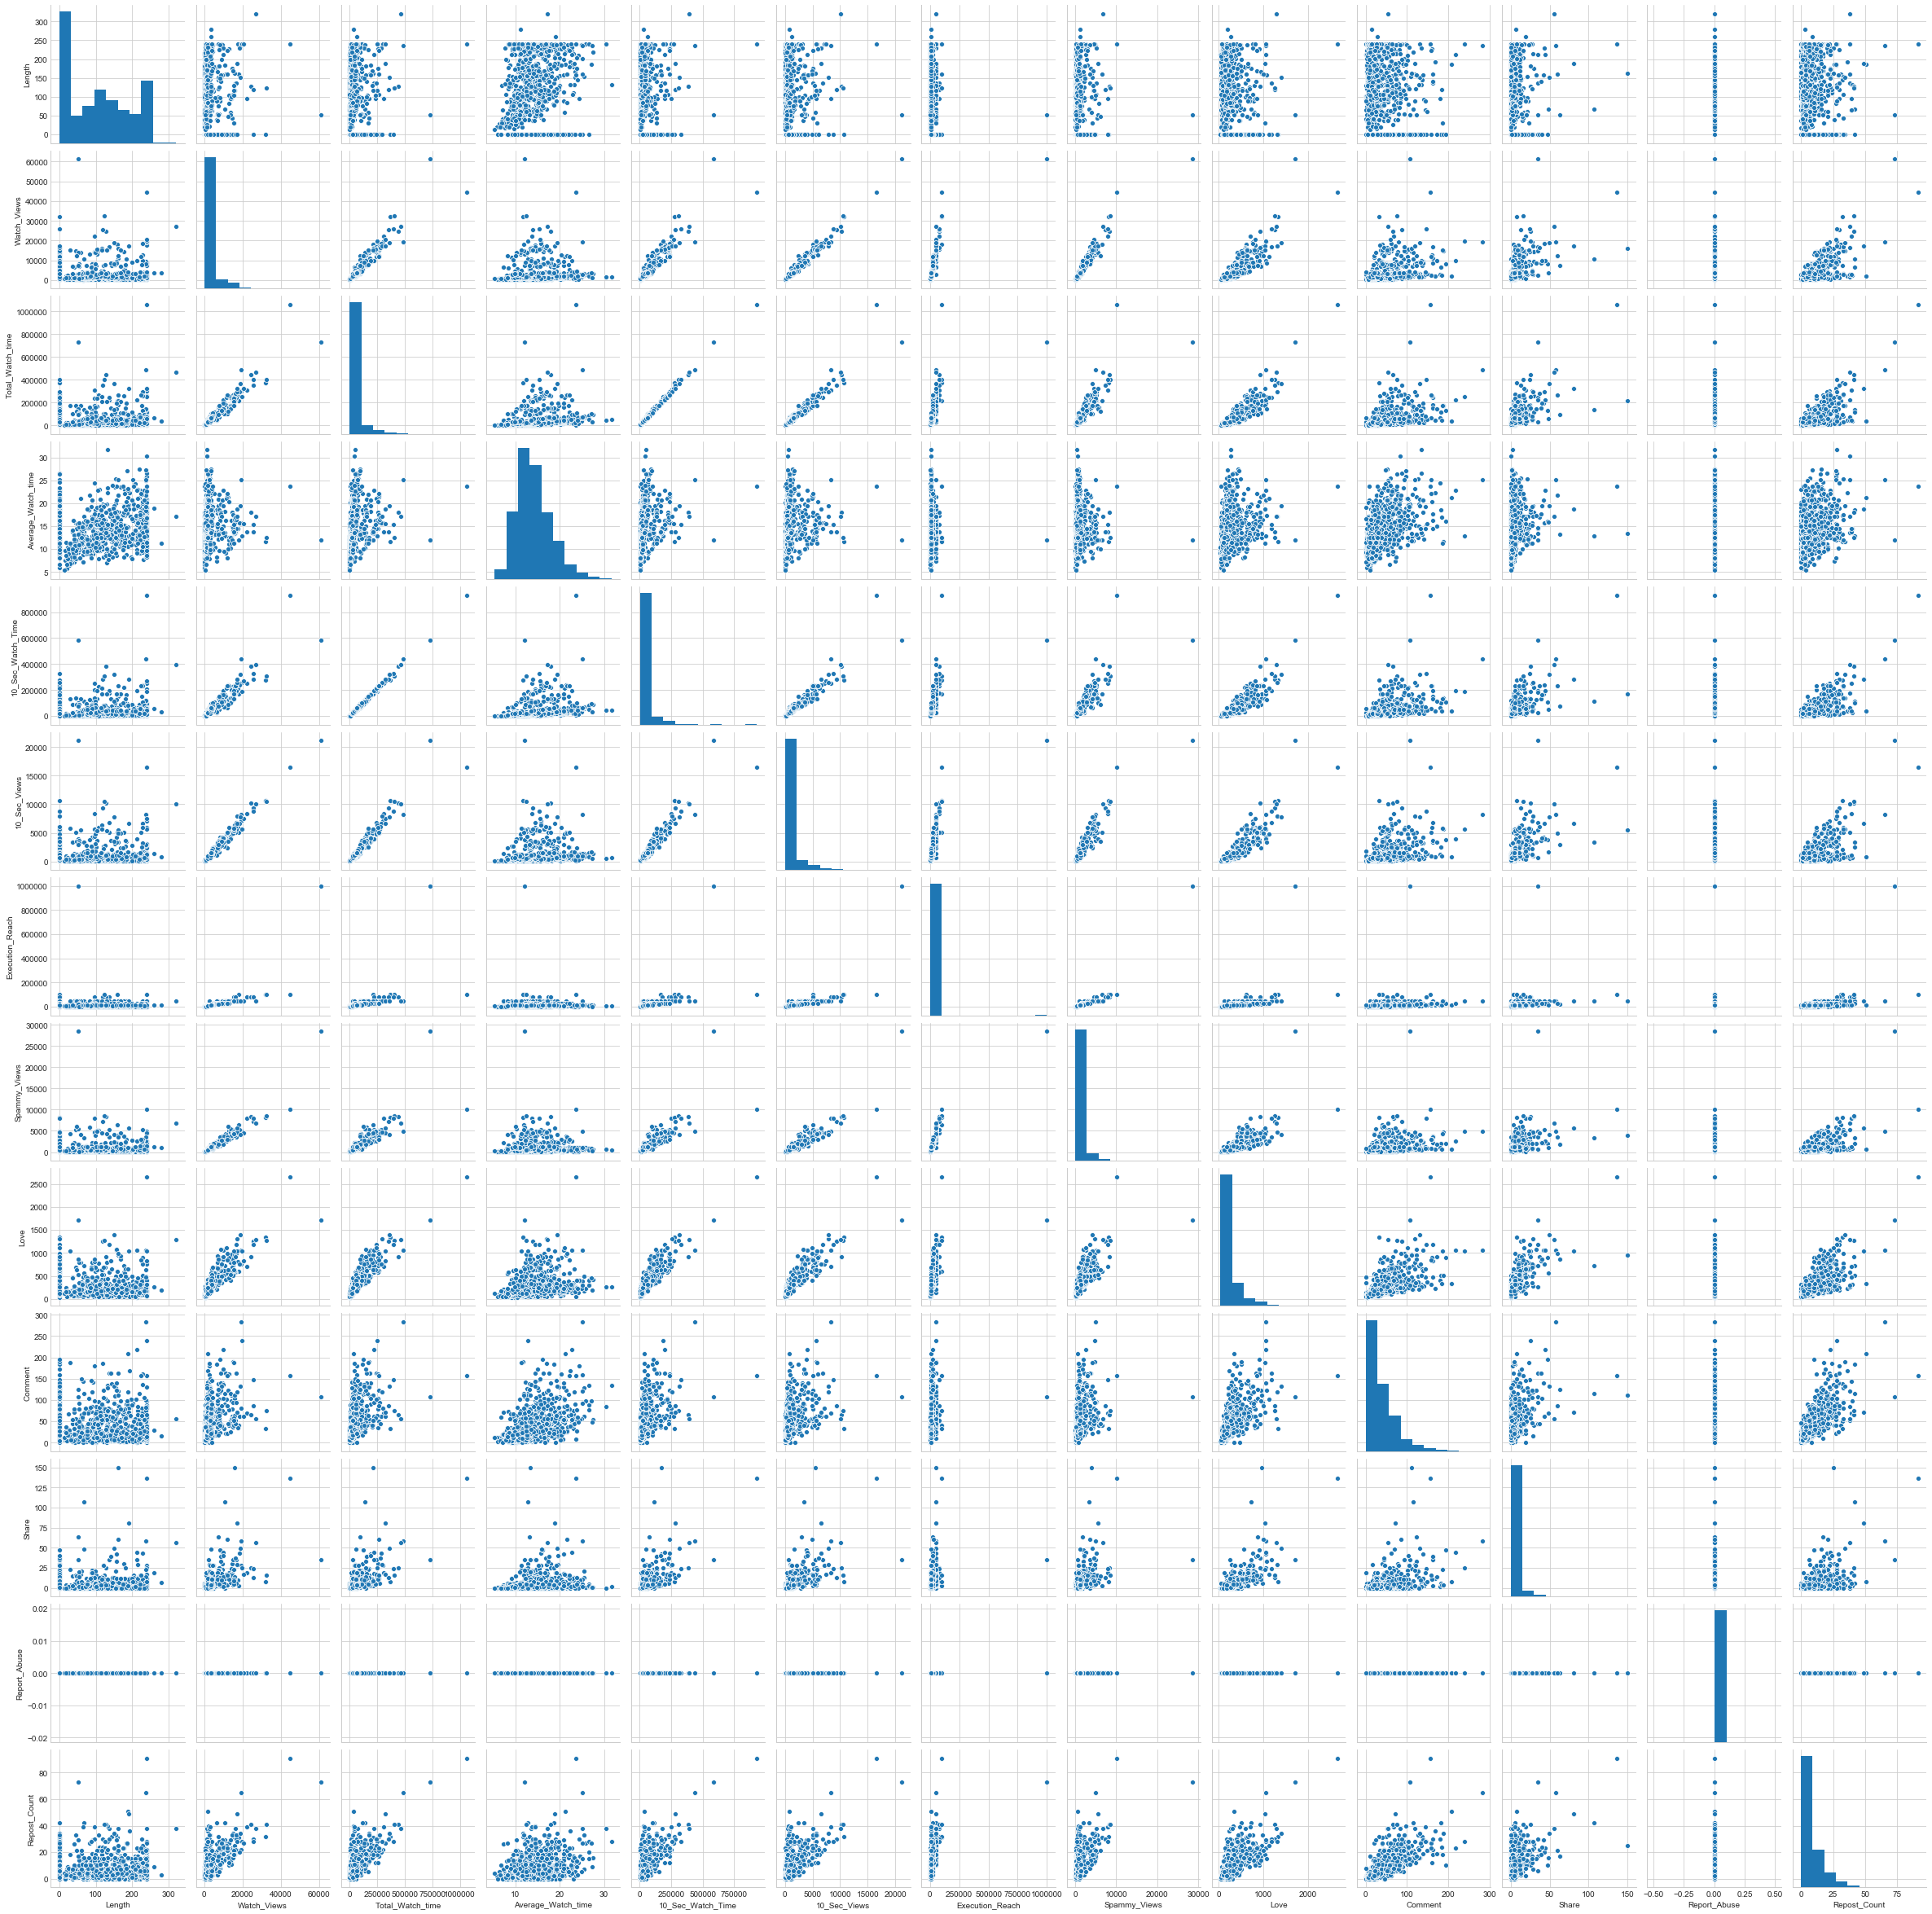

In [13]:
sns.pairplot(df1)

In [16]:
df1.corrwith(df1)

Length                1.0
Watch_Views           1.0
Total_Watch_time      1.0
Average_Watch_time    1.0
10_Sec_Watch_Time     1.0
10_Sec_Views          1.0
Execution_Reach       1.0
Spammy_Views          1.0
Love                  1.0
Comment               1.0
Share                 1.0
Report_Abuse          NaN
Repost_Count          1.0
dtype: float64

In [17]:
df1.columns

Index(['Creator_Name', 'Caption', 'Length', 'Watch_Views', 'Total_Watch_time',
       'Average_Watch_time', '10_Sec_Watch_Time', '10_Sec_Views',
       'Execution_Reach', 'Spammy_Views', 'Love', 'Comment', 'Share',
       'Report_Abuse', 'Repost_Count', 'Creation_type', 'ContentType',
       'LANGUAGE_NAME'],
      dtype='object')

<BarContainer object of 284 artists>

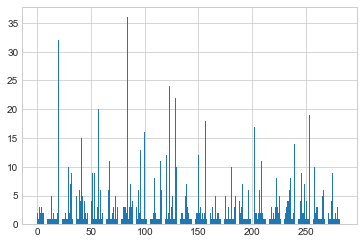

In [26]:
pl.bar(range(len(df1.groupby('Creator_Name')['Creator_Name'].count())),df1.groupby('Creator_Name')['Creator_Name'].count())

In [27]:
df1.groupby('Creator_Name')['Creator_Name'].count()

Creator_Name
#Safar                                       2
100fia Gulati                                1
@ghatakshabd,ullas                           3
@à¤–à¥€à¤²à¤¾ à¤°à¤¾à¤µà¤¤ à¤°à¤¾à¤µà¤¤ ,    2
AMIT MISHRA                                  3
                                            ..
â¤yukti nagpalâ¤                           1
âœï¸chai aur kavita                        3
âœï¸à¤•à¥à¤®à¤¾à¤° à¤°à¤‚à¤œà¥€à¤¤ðŸ™    1
â˜ºNitika BodanaâœŒâœï¸                    1
ðŸ’–ISHQ PARASTðŸ’–                          2
Name: Creator_Name, Length: 284, dtype: int64

In [30]:
np.unique(df1['Creator_Name'])

array(['#Safar', '100fia Gulati', '@ghatakshabd,ullas',
       '@à¤–à¥€à¤²à¤¾ à¤°à¤¾à¤µà¤¤ à¤°à¤¾à¤µà¤¤ ,', 'AMIT MISHRA',
       'ARCHANA RANGNATH SHINDE', 'AS Sabreen',
       'ASL Art International Yogesh Lohmod', 'AarviðŸ˜Š', 'Aashish Vyas',
       'Aastha13___', 'Abdul Azim Shaikh ', 'Ac_choudhary',
       'Adarsh Mishra "à¤†à¥›à¤¾à¤¦"', 'Aishwarya Agarwal',
       'Alpana Dobhal', 'Aman Mishra Amiya', 'Amee Vyas',
       'AmitRaj Sharma ', 'Anand Kumar', 'Anand Mohan Jha', 'Anand R J',
       'Angel poetess', 'Anjali Kumari', 'Anjali Srivastav',
       'Ankit Gupta', 'Anshh', 'Anshika ', 'Anshika Tiwari(@$)',
       'Anshula Thakur', 'Anshuman tripathi', 'Antima Jain',
       'Anushka Shukla', 'AshokKumar "à¤†à¤¶à¤¿à¤•à¥\x8d"',
       'Ashutosh Tripathi', 'Ashwika jaswal', 'Asmita Singh',
       'Astro Rahul Pandey (Sad writer)', 'Avit Shetty', 'Beena Tanti',
       'Bhawana Mehra', 'Bhawna Mishra', 'Bhupendra Padhara',
       'BiðŸ’–PreðŸ’“RoðŸ’ŸViðŸ’•ReetuðŸ¤—Reeta Bisht', 'Bob

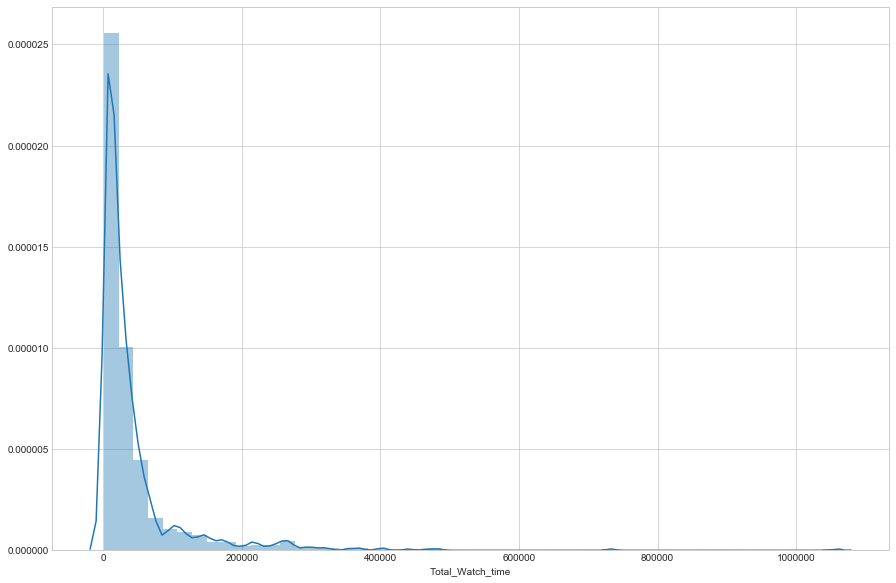

In [35]:
pl.figure(figsize=(15,10))
sns.distplot(df1['Total_Watch_time'])

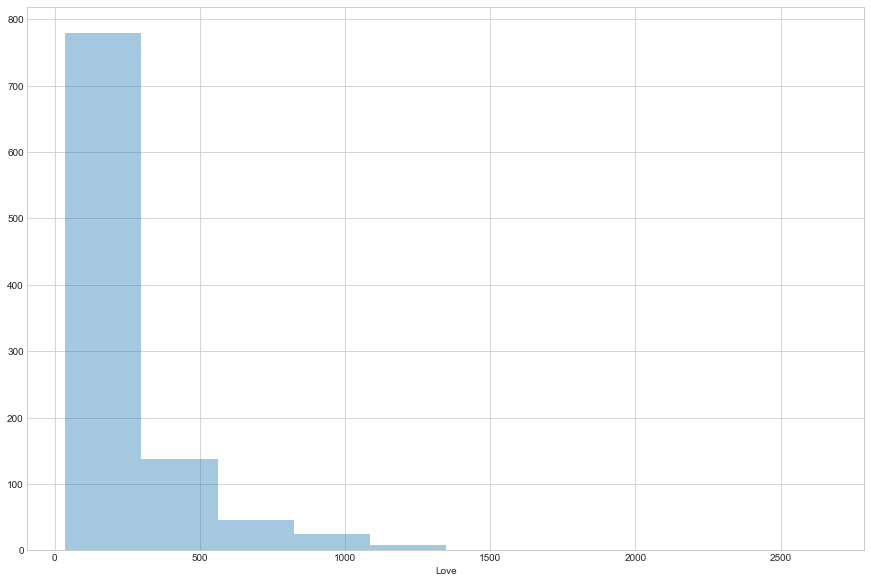

In [42]:
pl.figure(figsize=(15,10))
sns.distplot(df1['Love'],kde=False,bins=10)

(array([780., 138.,  46.,  25.,   8.,   1.,   1.,   0.,   0.,   1.]),
 array([  37.,  299.,  561.,  823., 1085., 1347., 1609., 1871., 2133.,
        2395., 2657.]),
 <a list of 10 Patch objects>)

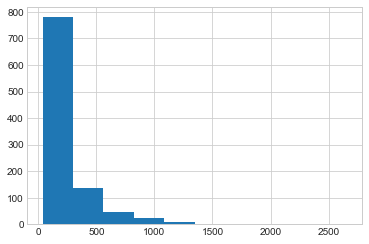

In [37]:
pl.hist(df1['Love'])

In [108]:
a=np.array(df1['Total_Watch_time']/(df1['Love']+df1['Watch_Views']+df1['Share'])).reshape(-1,1)

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler=MinMaxScaler(feature_range=(0,10))

In [117]:
scaler.fit(a)

MinMaxScaler(copy=True, feature_range=(0, 10))

In [118]:
df1['rating']=np.round(scaler.transform(a)).astype(int)

In [119]:
df1['rating']

0      3
1      3
2      6
3      5
4      4
      ..
995    3
996    5
997    4
998    5
999    6
Name: rating, Length: 1000, dtype: int32

In [120]:
df1.columns

Index(['Creator_Name', 'Caption', 'Length', 'Watch_Views', 'Total_Watch_time',
       'Average_Watch_time', '10_Sec_Watch_Time', '10_Sec_Views',
       'Execution_Reach', 'Spammy_Views', 'Love', 'Comment', 'Share',
       'Report_Abuse', 'Repost_Count', 'Creation_type', 'ContentType',
       'LANGUAGE_NAME', 'rating'],
      dtype='object')

In [121]:
df1.head()

,Creator_Name,Caption,Length,Watch_Views,Total_Watch_time,Average_Watch_time,10_Sec_Watch_Time,10_Sec_Views,Execution_Reach,Spammy_Views,Love,Comment,Share,Report_Abuse,Repost_Count,Creation_type,ContentType,LANGUAGE_NAME,rating
0,Nojoto News,Know who loved your story | Tag Nojotians #Noj...,51,61196,732610,12.0,584192,21149,1000000,28445,1720,108,35,0,73,Uploaded,Video,English,3
1,Nojoto News,Details for Day 1 (Monday) :- \nExpress Karo N...,168,2751,33002,12.0,25716,631,50000,1037,130,10,4,0,17,Uploaded,Video,English,3
2,Anand Mohan Jha,Anshh only 4 youðŸ˜‚ sorry #Nojoto #story #Poe...,0,7086,126534,17.9,110171,2777,50000,2606,337,113,9,0,21,Uploaded,Video,English,6
3,Anand Mohan Jha,#krishna_flute à¤®à¤¾à¤ à¤¤à¥‹ à¤®à¤¾à¤ à¤¹à...,0,1119,19908,17.8,17109,334,10000,447,114,34,2,0,12,Created,Video,English,5
4,Bhawna Mishra,#SuperMom #chitthi #letter #originalmess #message,116,1075,15966,14.9,13091,332,10000,376,143,49,1,0,13,Created,Video,English,4


In [128]:
a=np.array((df1['Love']+df1['Watch_Views']+df1['Share'])/df1['Total_Watch_time']).reshape(-1,1)

In [134]:
scaler.fit(a)
df1['rating']=np.round(scaler.transform(a)).astype(int)

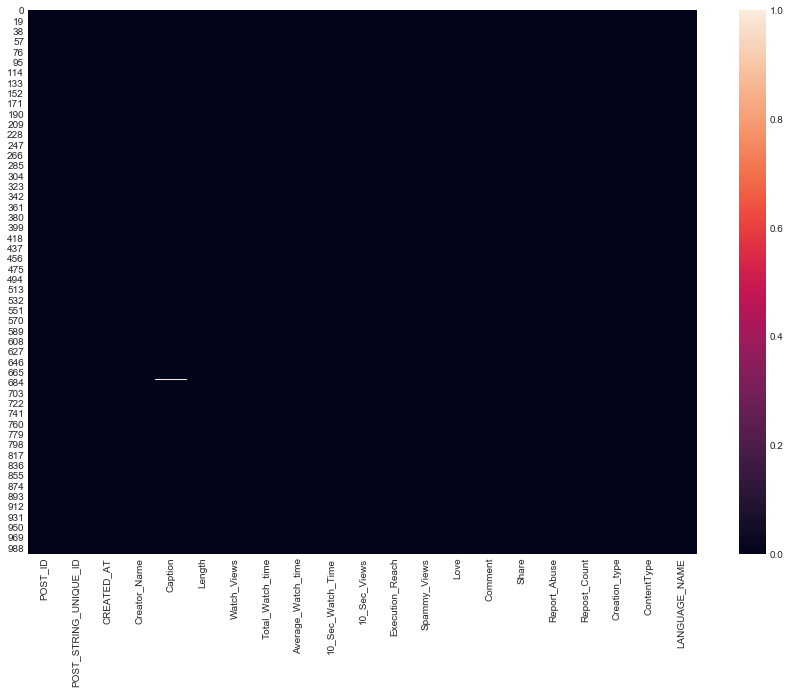

In [146]:
pl.figure(figsize=(15,10))
sns.heatmap(df.isnull())

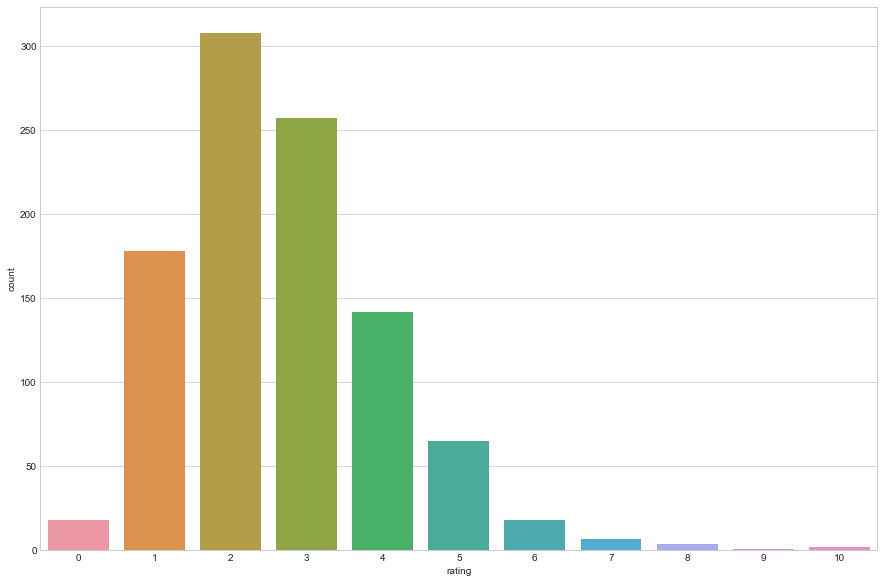

In [135]:
pl.figure(figsize=(15,10))
sns.countplot(df1['rating'])

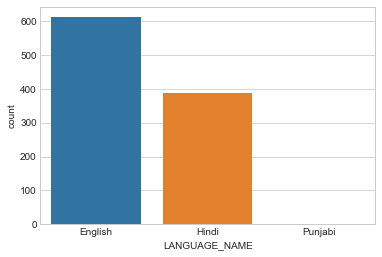

In [142]:
sns.countplot(df1['LANGUAGE_NAME'])

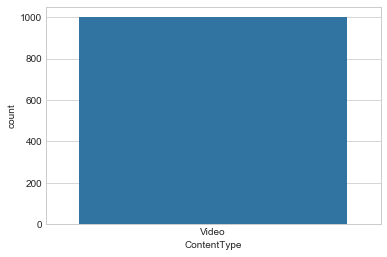

In [143]:
sns.countplot(df1['ContentType'])

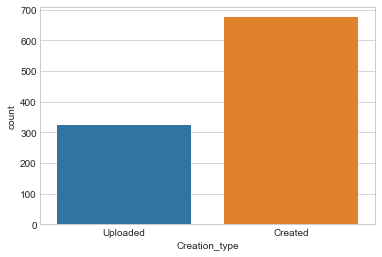

In [147]:
sns.countplot(df1['Creation_type'])

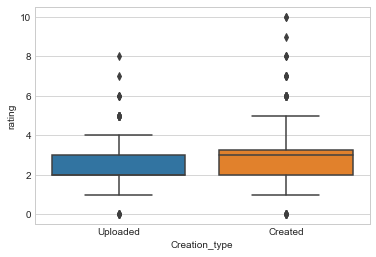

In [169]:
sns.boxplot(data=df1,y='rating',x='Creation_type')
pl.show()

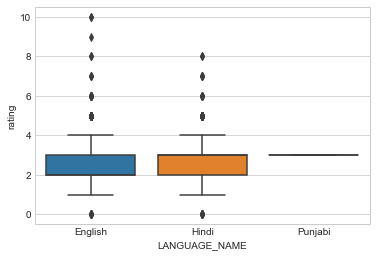

In [170]:
sns.boxplot(data=df1,y='rating',x='LANGUAGE_NAME')
pl.show()

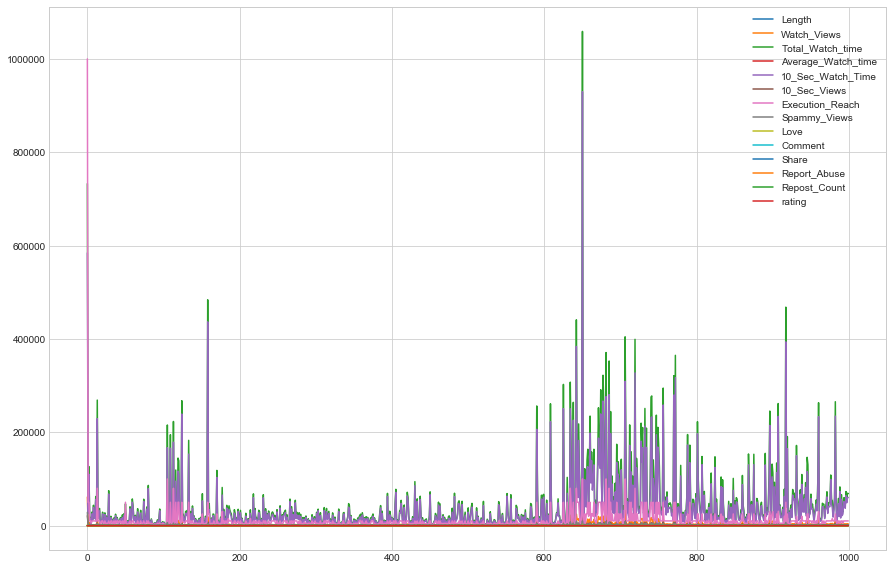

In [174]:
df1.plot(figsize=(15,10))